In [1]:
# Title: DMRG Ground State Search and Compression Algorithms
# Author: Aaron Sander
# Date: March-May 2020

# This program is used for initial learning of tensor network methods
# to be used in my bachelor thesis.
# It is an implementation of the Density Matrix Renormalization Group (DMRG)
# for the ground state search of a given Hamiltonian as an MPO as well as
# for compressing an arbitrary quantum state which has relevant applications
# in data compression and graph embedding.

### NOTE: This code is written for learning purposes. It is not meant
###       to be optimized for speed/efficiency, but has readability in mind.

In [2]:
######################### IMPORTS #############################################
import DMRG_functions.canonical_forms as can
import DMRG_functions.compression as comp
import DMRG_functions.ground_state_search as gnd
import DMRG_functions.initializations as init


import numpy as np
import math

# Ground State Search
This section looks for the ground state of the Ising Model with given parameters as accurately as a given threshold.

In [3]:
MPO = init.initialize_quantum_ising_MPO(num_sites=3, J=1, g=1)

Initial Energy: -2.073208859324262
Energy: -2.9814192114164273 BondDim: 1
Energy: -3.0597963649277986 BondDim: 1
Energy: -3.1316636110475016 BondDim: 1
Energy: -3.1595850382439385 BondDim: 1
Energy: -3.1621640750063853 BondDim: 1
Energy: -3.1622738038579326 BondDim: 1
Energy: -3.493959207434934 BondDim: 2
Energy: -3.4939592074349344 BondDim: 2
Energy: -3.4939592074349335 BondDim: 2


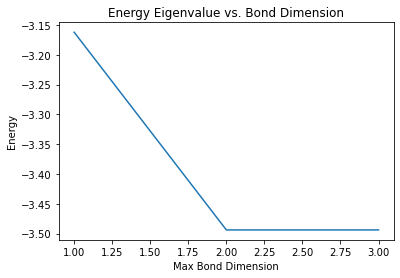

In [4]:
E, V, max_bond_dim = gnd.ground_state_search(MPO, threshold=1e-3, plot=1)

# Compression
This section converts an arbitrary n-bit string into an MPS and compresses it into one with a lower bond dimension.
The metrics used are cosine similarity (0 worst, 1 perfect), loss (1-cosSim), and Euclidean distance (-2 worst, 0 best)

In [5]:
data = init.initialize_random_normed_vector(length=512)

In [6]:
d = 2
raw_state = can.vector_to_left_canonical_MPS(data, phys_dim=d, num_sites=int(math.log(len(data), d)))

Sim: 0.7479968687885761 Dist: 0.5019991346719861 BondDim: 1
Sim: 0.7790126633752747 Dist: 0.47009290212119303 BondDim: 2
Sim: 0.8037090781700221 Dist: 0.44304731330860864 BondDim: 3
Sim: 0.832721307744027 Dist: 0.4089971787873032 BondDim: 4
Sim: 0.8583827885084891 Dist: 0.3763206232609547 BondDim: 5
Sim: 0.8792826474758788 Dist: 0.3474440279010737 BondDim: 6
Sim: 0.9054653181305635 Dist: 0.30746492786891233 BondDim: 7
Sim: 0.9293626997675117 Dist: 0.26577678648160175 BondDim: 8
Sim: 0.9400582813167707 Dist: 0.24482997913496612 BondDim: 9
Sim: 0.9553325114046409 Dist: 0.2113468442995052 BondDim: 10
Sim: 0.967372757569601 Dist: 0.18063012603217612 BondDim: 11
Sim: 0.9759380677344528 Dist: 0.15511909059025863 BondDim: 12
Sim: 0.9842188789056878 Dist: 0.12562293219913917 BondDim: 13
Sim: 0.9905220066958368 Dist: 0.0973549860261969 BondDim: 14
Sim: 0.9966519415908927 Dist: 0.057862409292264785 BondDim: 15


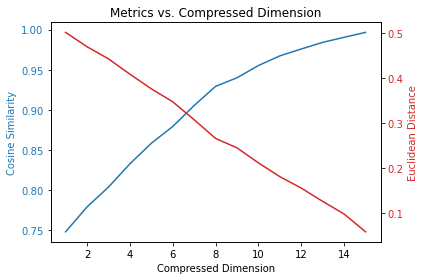

In [7]:
compressions, dist, sim = comp.compress(raw_state, threshold=1e-3, plot=1)